# Reducción de dimensionalidad con PCA
Como vimos en la clase pasada el **Análisis de Componentes Principales (PCA en Inglés)** nos permite por medio de los vectores y valores propios de la matriz de covarianza identificar esas direcciones especiales a lo largo de las cuales capturamos la mayor cantidad de varianza de los datos, esto puede implicar que lo que son un conjunto de datos de 10, 20 o 30 variables por decir un ejemplo; podemos reducirlo a una menor cantidad de variables, capturando una cantidad suficiente de varianza, quiere decir que estoy dispuesto a sacrificar cierto porcentaje de varianza, pero ahí estoy logrando reducir un numero de variables y eso me facilita darle al modelo de Machine Learning una cantidad de datos menor para que la procese. 

Ahora procederemos a realizarlo en Python, para saber como implementar la reducción de variables.

In [1]:
#Importando librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Creando un dataset
iris=sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


Ahora procederemos a Normalizar los datos con una función de Scikit Learn. Para ello necesitamos saber que columnas tiene el dataset: 

In [3]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Tomaremos el siguiente arreglo para pasarlo al proceso de **Escalamiento o Normalización**
```js
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
```

In [11]:
#Escalando el dataset
scaler = StandardScaler()

#Variables escaladas
scaled=scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
scaled[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Ahora obtengamos la covarianza del set de datos: $scaled$, pero antes de ello vayamos a la documentación de Numpy para [Covarianza](https://numpy.org/doc/stable/reference/generated/numpy.cov.html ).

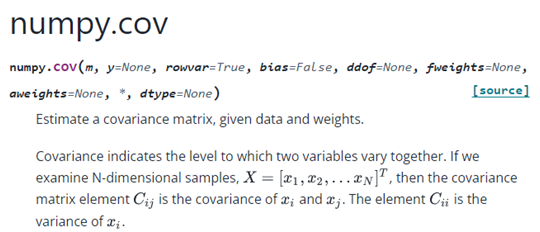

El texto anterior nos dice que si queremos calcular la varianza en ciertas variables de nuestro data set $X$, tenemos que realizarle una $Transposición a la matriz.
$$X=\{x_1,x_2,x_3,...,x_n\}^T$$
Así la covarianza del elemento $C_{ij}$ estaría dada por la covarianza de $x_i$ y $x_j$. Por último la varianza de $X_{ii}$ es la varianza de $x_i$

Para nuestro caso $X= scaled$ y nuestro arreglo quedaría como: $\{'sepal\_ length', 'sepal\_ width', 'petal\_ length', 'petal\_ width' \}$


In [13]:
# Calculando Matriz de Covarianza
cov_mat=np.cov(scaled.T)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

Listo ya tenemos el calculo de la matriz, la matriz resultante es una matriz 4x4, porque calcula la relación de todas variables

<Axes: >

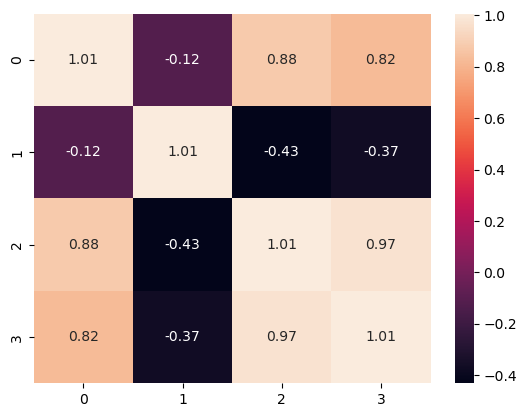

In [15]:
sns.heatmap(cov_mat,annot=True,fmt='.2f')

`{'sepal_length', 'sepal_width', 'petal_length', 'petal_width'}`

Recordemos que van en ese orden.

También observemos las correlaciones que hay en el dataset por medio de un diagrama similar

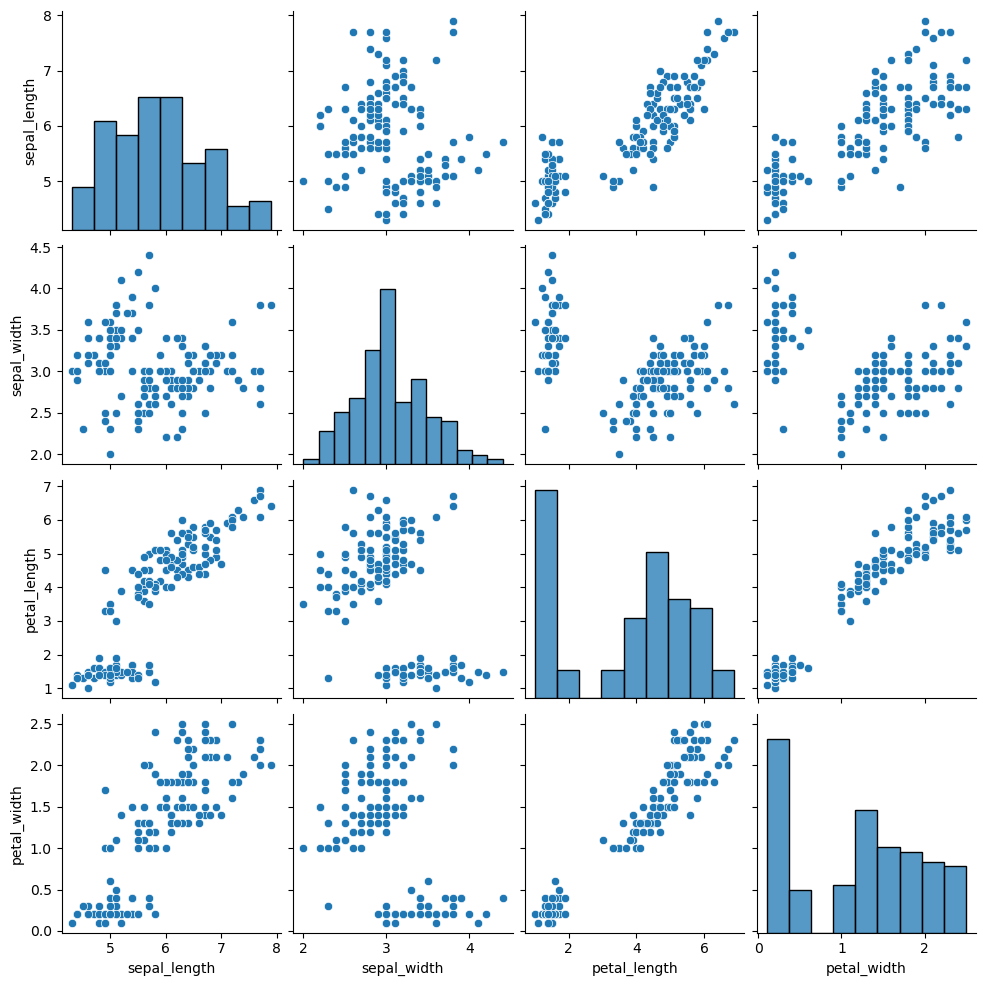

In [16]:
sns.pairplot(iris)

Este diagrama es el mismo diagrama que graficamos en heatmap, bueno no es el mismo pero representan conceptos similares.
Como se puede observar a simple vista, las gráficas de 
- petal_length vs petal width
- petal width vs petal_length 
Son los mismos y a simple vista tienen un comportamiento interesante en la correlación. Hagamos un gráfico de comparación

### Graficando
Yo quiero ver el diagrama de dispersion con las variables en crudo y estandarizadas.

¿Cómo queda el mismo diagrama de dispersion con las variables estandarizadas?¿Por que es importante esto?¿Por qué estamos estandarizando el data set antes de aplicarle el **PCA**?    
La razón es sencilla, si nos dimos cuenta en la clase anterior el **PCA** lo que hace es calcular la sombra de los vectores pero considerando que los datos estaban centrados. Y esto es más evidente si nosotros tenemos un conjunto de datos que tiene un promedio $0$ y que tiene un desviación estándar de $1$, es decir datos estandarizados.

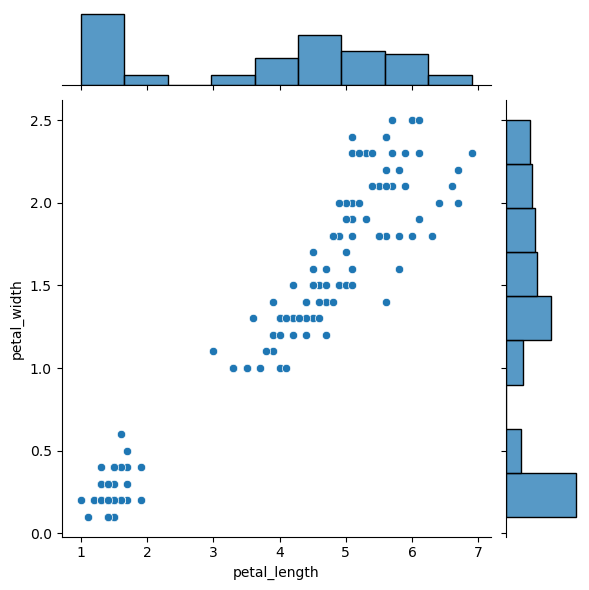

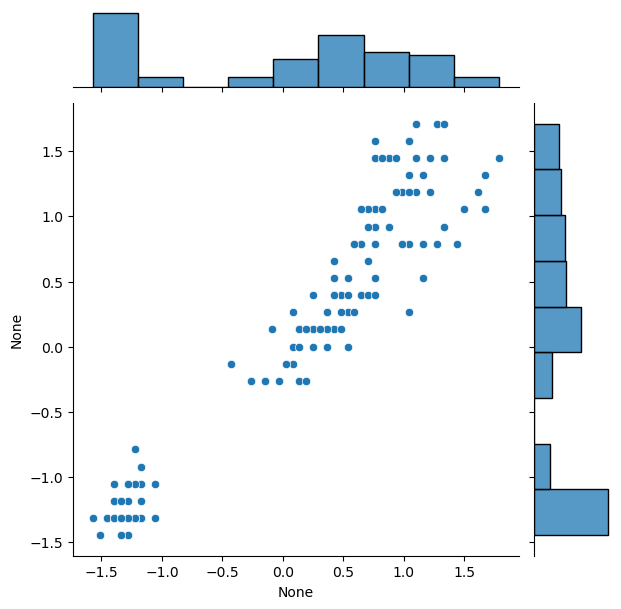

In [20]:
#comparemos las variables
sns.jointplot(x=iris['petal_length'],y=iris['petal_width'])

#Comparemos las variables pero con la data estandarizada
sns.jointplot(x=scaled[:,2],y=scaled[:,3])

#Recordemos que las categoría 'petal_length' esta en la columna 3
# y 'petal_width' esta en la columna 4

Veamos los diagramas de dispersion:
1. Es el diagrama con los datos originales
2. Es el diagrama con los datos estandarizados, pareciera que no se ve distinto, pero miremos las escalas; como se puede observar ya tenemos un valor 0 y los datos tienen una dispersión que esta asociada a una varianza unitaria.

Luego de esto viene la parte de calcular los valores y vectores propios, usaremos la siguiente función
`numpy.linalg.eig()`
- https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
Que lo que hace es calcular los vectores y valores de una matriz de forma inmediata.

In [21]:
#Obteniendo los vectores y valores propios
#de la matriz de covarianza
eigen_values,eigen_vectors =np.linalg.eig(cov_mat)

Ya ha calculado los valores y vectores propios de la matriz, recordemos que $\lambda = \text{ valores propios}$ y $v = \text{ vectores propios}$

In [22]:
#Desplegando valores propios
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [24]:
#Desplegando vectores propios
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

Ya que los hemos calculado.

Pongamos en claro la tarea de estos parámetros; su tarea es capturar la mayor cantidad de varianza de los datos y que cada una de estas direcciones es lo que llamamos una dirección principal.
## IMPORTANTE
### Recuerda cada uno de los vectores propios es una de las direcciones principales a lo largo de la cual capturamos varianza de los datos originales.    
¿Cómo podemos ver esto claramente?    
Creamos una lista de explicación de varianza.

Vamos a crear una lista vacía para añadir la varianza que los vectores propios explican. De acuerdo a las matemáticas para calcular la varianza que los vectores nos explican se puede calcular proporcional a la relación entre el **valor propio particular** y la **suma de todos los valores propios que están en la matriz**. 
Pongamoslo en código 

$$Varianza  _{\text{ eigen value}} = \frac{ \text{eigen value}_i} {\sum_{i=1} ^N (\text{eigen value}_i)}100\%$$

In [32]:
variance_explained=[]

for index,eigen_value in enumerate(eigen_values):
    variance_explained.append((eigen_value/sum(eigen_values))*100)
    print(f'Varianza de eigen value[{index+1}] = { variance_explained[index]} %')


Varianza de eigen value[1] = 72.9624454132999 %
Varianza de eigen value[2] = 22.850761786701725 %
Varianza de eigen value[3] = 3.6689218892828683 %
Varianza de eigen value[4] = 0.5178709107155036 %


Esto nos dice que una $4^{ta}$ componente la podemos quitar y tal vez una $3^{ra}$ componente si estamos dispuestos a sacrificar el $\approx 5\%$ total de la varianza.

### Ahora ¿Cómo podemos tomar esa transformación y reducir los datos a $n$ dimensiones con base en esto?
Pasamos de usar Numpy a usar Scikit Learn     
De la parte de `decomposition` de **Scikit** usamos `PCA`
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [34]:
#Importando la funcion PCA
from sklearn.decomposition import PCA

La idea con esta función es poder crear una instancia **PCA**, le tenemos que pasar un argumento y decirle **Yo quiero reducirnos a `n_components`**; es decir quiero reducir a cierto numero de componentes. En nuestro caso vamos a crearlo para que nos reduzca a 2 componentes.     
Después cuando este listo, le dire que haga el **ajuste (fit)** sobre los datos, **PERO: NO SON LOS DATOS ORIGINALES, SINO LOS DATOS ESTANDARIZADOS (ESCALADOS)**. 

Veamos los resultados

In [35]:
#Creando una instancia y estableciendo la reducción
# a 2 componentes
pca=PCA(n_components=2)

#Aplicando la instancia a los datos escalados
pca.fit(scaled)

PCA(n_components=2)

Ya me ha generado la reducción de componentes.

#### Importante:    
PCA tiene diferentes métodos, entre ellos `explained_variance_ratio_` que me dice como es la varianza con respecto a las componentes. Es decir algo similar a lo que hicimos anteriormente.

In [37]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

Fijémonos que las 2 primeras direcciones capturan la misma varianza que nos entregó el método de PCA.

Entonces el método comienza con las direcciones o variables que mas varianza capturan y va descartando las subsecuentes .

También ahora podemos aplicar la reducción de los datos a nuestro dataset. O lo que debemos entregar a nuestro modelo de Machine Learning.

In [39]:
# Obteniendo las variables reducidas en 
# un nuevo conjunto
reduced_scaled=pca.transform(scaled)

Ahora mediante la linea de código anterior le estamos diciendo que obtengamos las variables que fueron **escaladas y después reducidas con PCA**, lo que hago es simplemente llamo al método `pca.transform()` y le digo que le aplique la reducción a mis set de datos `scaled`. Entonces `reduced_scaled`me va a entregar la transformación resultante de la descomposición de valores y vectores propios.

In [40]:
#le decimos que nos entregue las primeras 5 filas de
#la nueva transformación
reduced_scaled[:5,]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

Entonces si yo coloco el `set original escalado` era la misma longitud de datos pero, pero cada **datapoint** tenia los 4 componentes de los atributos de la flor `['sepal_length', 'sepal_width', 'petal_length', 'petal_width']` y ahora solo nos entrega 2 componentes con la misma longitud del dataset.

Aquí tenemos claro que el **PCA** esta reduciendo los datos que en total esta capturando la suma de 0.7296% + 0.2285% de la varianza, debido a la suma de la varianza de sus componentes, lo cual es bastante decente y es $\approx 95\%$ de la varianza total.

Y lo implemento en el dataset

In [41]:
# Implementando en el data frame
iris['pca_1'] = reduced_scaled[:, 0]
iris['pca_2'] = reduced_scaled[:, 1]
iris

,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.870503,0.386966
146,6.3,2.5,5.0,1.9,virginica,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,virginica,1.521170,0.269069
148,6.2,3.4,5.4,2.3,virginica,1.372788,1.011254


Ahora lo que tengo son mis 2 variables listas para implementarlas en un algoritmo, vemos como en el data frame añadí 2 entradas que las contienen.

Ahora el siguiente paso es ver como se despliega de manera gráfica este conjunto de datos:
### Escalado y reducido a 2 componentes principales 

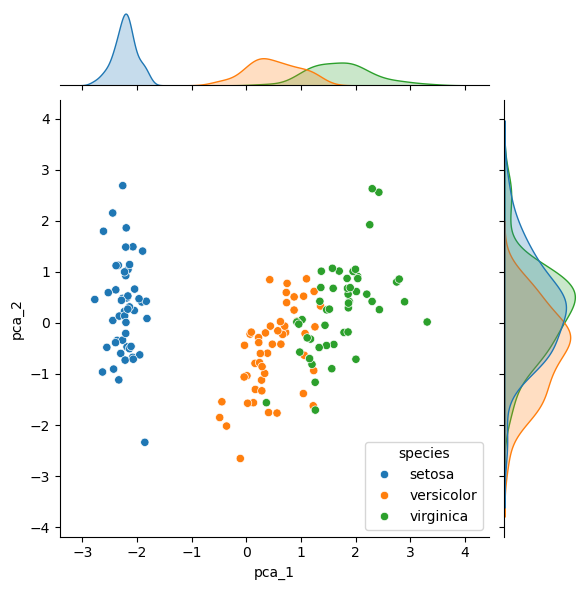

In [42]:
#Graficando las variables
sns.jointplot(x = iris['pca_1'], y= iris['pca_2'], hue=iris['species'])

Este nuevo gráfica de dispersion no es de los datos originales sino de las dimensiones reducidas y se supone que esta nueva distribución de datos, ya esta contemplando por lo menos el $95\%$ de la varianza total de los datos. ¿Hay perdida de información? Si, per es minima; un $5\%$.

Estamos viendo que en este nuevo espacio reducido, los datos tienen cierta capacidad de evidenciar patrones de correlación y puedo también ver cierta separación entre las categorías. En este punto es cuando tomo los datos y empiezo a trabajar sobre si quiero hacer predicciones, clasificación, etc. 

Y esta es la forma final como Seaborn nos puede mostrar los resultados de las componentes reducidas.